Role определяется в разделе Modify

In [1]:
%matplotlib notebook
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import requests
from datetime import datetime
import time
from requests.auth import HTTPBasicAuth
import sys
import io
import datetime
import math 
import sklearn 

In [2]:
ROLE = '5.0'

### Missings

In [3]:
def findColumnsWithNan(d):
    features = list(d)
    containsMissings = []
    for i in range(0, d.shape[1]):
        if d.iloc[:, i].count() < d.shape[0]:
            containsMissings.append(features[i])
    return containsMissings

## DataFrame print settings

In [4]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 12)

# Sample

In [5]:
df = pd.read_csv('ABT.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64",
                                    "role" : "object"
                               })

In [6]:
# df.drop(['team_id', 'player'], inplace=True, axis=1)
features = list(df)
target = 'win'

In [7]:
df.groupby('role').count()[['match_id']]

,match_id
role,
1.0,504
2.0,547
3.0,551
4.0,547
5.0,551


In [8]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

In [9]:
id_columns = [
    'account_id',    
    'duration', 
    'hero_id',
    'leagueid',                          
    'leaguename',
    'match_id',
    'player_slot',
    'start_time',
    'team_id',
    'team',
    'player',
    'id_x',
    'datetime',
    'attack_type_y',
    'id_y',
    'localized_name_y',
    'localized_name_x',
    'primary_attr_y',
    'Unnamed: 0',   
    'role',
]
categorical_columns = [x for x in categorical_columns if x not in id_columns]
numerical_columns = [x for x in numerical_columns if x not in id_columns]

# EXPLORE

In [10]:
df[categorical_columns].describe()

,attack_type_x,cluster,primary_attr_x,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
count,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367
unique,2,28,3,2,2,2,2,2,2,2,2,2
top,Ranged,113,int,1,1,0,0,1,0,1,0,0
freq,2775,1569,2155,2685,4177,3496,3094,2945,4400,4094,4256,3638


In [11]:
for c in categorical_columns:
    print(c,'= ',df[c].unique())

attack_type_x =  ['Ranged' 'Melee']
cluster =  ['111' '112' '113' '121' '122' '181' '224' '123' '133' '185' '188' '186'
 '152' '154' '202' '151' '184' '183' '136' '137' '131' '153' '134' '138'
 '135' '182' '156' '132']
primary_attr_x =  ['int' 'str' 'agi']
Carry =  ['0' '1']
Disabler =  ['1' '0']
Durable =  ['0' '1']
Escape =  ['0' '1']
Initiator =  ['1' '0']
Jungler =  ['0' '1']
Nuker =  ['1' '0']
Pusher =  ['1' '0']
Support =  ['1' '0']


In [12]:
df[numerical_columns].describe()

,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,t_sen_cnt_30,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
count,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5327.000000,5237.000000,5367.000000,4919.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5327.000000,5237.000000,5367.000000,4919.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5327.000000,5237.000000,5367.000000,4919.000000,5367.000000,5367.000000,5367.000000,5367.000000,64.000000,1165.000000,672.000000,206.000000,1615.000000,5349.000000,816.000000,144.000000,43.000000,834.000000,507.000000,182.000000,318.000000,3389.000000,207.000000,944.000000,1409.000000,719.000000,51.000000,228.000000,1035.000000,302.000000,179.000000,2323.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.00000,...,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.0,5367.000000,5367.0,5367.0,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.0,5367.000000,5367.0,5367.0,5334.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5327.000000,5237.000000,4919.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5327.000000,5237.000000,4919.000000,5367.000

In [13]:
df[numerical_columns].corr()

,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,win,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
assists,1.000000,0.083491,0.072122,0.087870,-0.135625,-0.052757,0.013287,0.227903,0.292956,0.109938,0.182421,0.021133,0.406206,0.309192,-0.183599,-0.178444,-0.169228,-0.140428,-0.096852,-0.159516,-0.059863,-0.179293,-0.182066,-0.176715,-0.179339,-0.178447,-0.173283,-0.161774,-0.163881,-0.146506,-0.171311,-0.174185,-0.235606,-0.238804,-0.245758,-0.250482,-0.251577,-0.201469,-0.250132,-0.219263,-0.232135,0.059296,0.492278,0.160214,0.214326,0.068223,0.096810,-0.020114,0.090676,-0.106891,-0.040750,0.124590,-0.059308,0.140920,0.124956,-0.024736,0.122405,0.117030,0.010611,0.045639,0.072332,0.026620,-0.037330,0.060373,-0.052143,0.160665,0.150761,-0.055828,0.036149,0.104617,0.110665,0.114433,0.119725,0.121630,0.081570,...,0.182671,0.181812,0.182570,0.185687,0.186171,0.154786,0.192092,0.169564,0.178587,0.137952,0.134575,0.114566,0.104191,0.113814,0.033220,0.133390,0.115686,0.136768,0.137952,0.134575,0.114566,0.104191,0.113814,0.033220,0.133390,0.115686,0.136768,-0.006724,-0.005639,-0.027825,-0.035320,-0.051381,NaN,-0.079460,NaN,NaN,-0.006724,-0.005639,-0.027825,-0.035320,-0.051381,NaN,-0.079460,NaN,NaN,0.077030,0.103298,0.111299,-0.159516,-0.179293,-0.182066,-0.183599,-0.178444,-0.169228,-0.140428,-0.096852,-0.059863,-0.163881,-0.171311,-0.174185,-0.176715,-0.179339,-0.178447,-0.173283,-0.161774,-0.146506,-0.201469,-0.219263,-0.232135,-0.235606,-0.238804,-0.245758,-0.250482,-0.251577,-0.250132
camps_stacked,0.083491,1.000000,0.937342,0.018305,-0.201848,0.012455,-0.127162,-0.038353,-0.068049,0.029300,-0.133068,-0.059983,-0.020808,0.002252,-0.190741,-0.186347,-0.170025,-0.156805,-0.141895,-0.172767,-0.135699,-0.195278,-0.195050,-0.205212,-0.204064,-0.

# Modify

# By carry role (role = 1)

In [14]:
df = df[df['role'] == ROLE]

In [15]:
df

,Unnamed: 0,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,denies,duration,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kills,last_hits,leagueid,leaguename,level,localized_name_x,match_id,player_slot,primary_attr_x,start_time,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id_x,datetime,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,...,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30,team,player,role
9,9,82262664,7,Ranged,1.0,113,3.0,7,3,2842,144,347,15085,14536,0,27,1,164,5401,The International 2017,21,Shadow Shaman,3358011344,130,int,1501956939,38.4979,1000.0,1494.0,2832.0,3679.0,6193.0,254.0,8307.0,366.0,744.0,1095.0,1486.0,2040.0,3012.0,4615.0,239.0,6651.0,423.0,757.0,8.0,12.0,16.0,19.0,22.0,2.0,42.0,2.0,4.0,2163.0,4062,True,408,3358011344_82262664,05.08.2017 21:15:39,NaN,1278.0,NaN,NaN,NaN,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875.0,NaN,...,0,1,0.2,0.250000,0.266667,0.25,0.20,0.000000,0.200000,0.0,0.125,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,1,1,Ranged,27,Shadow Shaman,int,16.0,110.0,51.0,84.666667,73.2,93.000,100.0,124.500000,188.800000,183.95,247.72,276.900000,79.666667,84.6,94.625,109.5,123.833333,136.000000,150.60,184.60,221.700000,0.666667,0.4,0.500,0.8,1.000000,1.066667,0.95,0.88,1.400000,Team Liquid,KuroKy,5.0
12,12,82262664,11,Ranged,1.0,113,3.0,8,3,2068,265,316,9030,7241,0,27,1,65,5401,The International 2017,14,Shadow Shaman,3356308437,2,int,1501897986,24.6097,927.0,1196.0,2620.0,3307.0,5105.0,25.0,6297.0,235.0,735.0,987.0,1262.0,2029.0,2782.0,4125.0,281.0,6068.0,463.0,805.0,2.0,2.0,3.0,5.0,24.0,1.0,36.0,1.0,2.0,2163.0,3905,True,269,3356308437_82262664,05.08.2017 04:53:06,NaN,1411.0,NaN,NaN,NaN,397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976.0,NaN,...,1,1,0.1,0.083333,0.133333,0.10,0.12,0.333333,0.133333,0.2,0.125,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,1,1,Ranged,27,Shadow Shaman,int,16.0,110.0,51.0,8.333333,47.0,91.875,92.7,99.666667,174.666667,165.35,204.20,209.900000,93.666667,92.6,100.625,98.7,105.166667,135.266667,139.10,165.00,202.266667,0.333333,0.2,0.250,0.2,0.166667,0.200000,0.25,0.96,1.200000,Team Liquid,KuroKy,5.0
13,13,6922000,9,Ranged,1.0,113,6.0,6,6,2871,67,290,10280,12544,0,27,2,84,5401,The International 2017,19,Shadow Shaman,3356214219,4,int

## Binarization

In [16]:
df_dummies = pd.get_dummies(df[categorical_columns])
binary_columns = list(df_dummies)

In [17]:
df = pd.concat([df, df_dummies], axis = 1)

## Heroes Popularity

In [18]:
heroPopularity = dict()
heroPopularityList = []
for f in list(df):
    popularity = 0
    if f.find('localized_name_') != -1 and f != 'localized_name_x' and f != 'localized_name_y':
        popularity = df[f].sum()
        heroPopularity[f] = popularity
from operator import itemgetter
heroPopularityList = sorted(heroPopularity.items(), key=itemgetter(1), reverse=True)

In [19]:
heroPopularityList

[]

## Missings

In [20]:
NanColumns = findColumnsWithNan(df)

In [21]:
NanColumns

['t_experience_cnt_20',
 't_experience_cnt_25',
 't_experience_cnt_30',
 't_gold_cnt_20',
 't_gold_cnt_25',
 't_gold_cnt_30',
 't_lasthits_cnt_20',
 't_lasthits_cnt_25',
 't_lasthits_cnt_30',
 'team_id',
 't_item_aether_lens',
 't_item_arcane_boots',
 't_item_black_king_bar',
 't_item_blade_mail',
 't_item_blink',
 't_item_boots',
 't_item_bottle',
 't_item_desolator',
 't_item_echo_sabre',
 't_item_force_staff',
 't_item_hand_of_midas',
 't_item_hurricane_pike',
 't_item_invis_sword',
 't_item_magic_wand',
 't_item_manta',
 't_item_phase_boots',
 't_item_power_treads',
 't_item_ring_of_aquila',
 't_item_silver_edge',
 't_item_sphere',
 't_item_tranquil_boots',
 't_item_travel_boots',
 't_item_ultimate_scepter',
 't_item_wind_lace',
 'pro_ban',
 't_experience_rpm_20',
 't_experience_rpm_25',
 't_experience_rpm_30',
 't_gold_rpm_20',
 't_gold_rpm_25',
 't_gold_rpm_30',
 't_lasthits_rpm_20',
 't_lasthits_rpm_25',
 't_lasthits_rpm_30']

In [22]:
df = df.fillna(df.mean())

In [23]:
findColumnsWithNan(df)

['team_id', 't_item_silver_edge', 't_item_travel_boots']

In [24]:
df = df[~df['role'].apply(lambda x: math.isnan(float(x)))]

In [25]:
findColumnsWithNan(df)

['team_id', 't_item_silver_edge', 't_item_travel_boots']

## Data Partition

In [26]:
if target in categorical_columns:
    categorical_columns.remove(target)
    print("Removed from categorical")
if target in numerical_columns:
    numerical_columns.remove(target)
    print("Removed from numerical")
if target in binary_columns:
    binary_columns.remove(target)
    print("Removed from numerical")

Removed from numerical


In [27]:
X = pd.concat([df[numerical_columns], df[binary_columns]], axis = 1)
y = df[target]

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

385 166


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Drop List

In [29]:
clusterVars = []
for f in list(X_train):
    if f.find('cluster') != -1:
        clusterVars.append(f)
clusterVars

['cluster_111',
 'cluster_112',
 'cluster_113',
 'cluster_121',
 'cluster_122',
 'cluster_123',
 'cluster_131',
 'cluster_132',
 'cluster_133',
 'cluster_134',
 'cluster_135',
 'cluster_136',
 'cluster_137',
 'cluster_138',
 'cluster_151',
 'cluster_152',
 'cluster_153',
 'cluster_154',
 'cluster_156',
 'cluster_181',
 'cluster_182',
 'cluster_183',
 'cluster_185',
 'cluster_186',
 'cluster_188',
 'cluster_202',
 'cluster_224']

## Normalization [0,1]

In [30]:
X_train_norm = X_train[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X_test_norm = X_test[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [31]:
X_train_norm = pd.concat([X_train[binary_columns], X_train_norm], axis = 1)
X_test_norm = pd.concat([X_test[binary_columns], X_test_norm], axis = 1)
print(X_train_norm.shape, X_test_norm.shape)

(385, 220) (166, 220)


In [32]:
trainColumnsWithNan = findColumnsWithNan(X_train_norm)
testColumnsWithNan = findColumnsWithNan(X_test_norm)
ColumnsWithNan = trainColumnsWithNan
for col in testColumnsWithNan:
    if col not in trainColumnsWithNan:
        ColumnsWithNan.append(col)
print(ColumnsWithNan)

['t_item_silver_edge', 't_item_sphere', 't_item_travel_boots', 't_buyback_cnt_10', 't_buyback_cnt_12', 't_buyback_cnt_3', 't_buyback_cnt_5', 't_buyback_cnt_8', 't_buyback_rpm_10', 't_buyback_rpm_12', 't_buyback_rpm_3', 't_buyback_rpm_5', 't_buyback_rpm_8', 't_item_blade_mail', 't_item_echo_sabre', 't_item_manta', 't_buyback_cnt_15', 't_buyback_cnt_20', 't_buyback_rpm_15', 't_buyback_rpm_20']


In [33]:
X_train_norm = X_train_norm.drop(ColumnsWithNan, axis = 1)
X_test_norm = X_test_norm.drop(ColumnsWithNan, axis = 1)

## Outliers detection

In [34]:
from sklearn.ensemble import IsolationForest

isNotOutlier = IsolationForest(contamination = 0.01)
isNotOutlier.fit(X_train_norm)

IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [35]:
# X_train_norm_filtered = X_train_norm[isNotOutlier.predict(X_train_norm) == 1]
X_train_norm_filtered = X_train_norm
# y_train_filtered = y_train[isNotOutlier.predict(X_train_norm) == 1]
y_train_filtered = y_train

In [36]:
print(X_train_norm_filtered.shape, y_train_filtered.shape)

(385, 200) (385,)


# Model

## Regression

In [37]:
X_train_norm_filtered.drop(clusterVars, axis = 1, inplace = True)
X_test_norm.drop(clusterVars, axis = 1, inplace = True)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lm = LogisticRegression(penalty = 'l1', C = 1, fit_intercept=False)
lm.fit(X_train_norm_filtered, y_train_filtered)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Assess

In [39]:
X_train_norm_filtered.shape, X_test_norm.shape

((385, 173), (166, 173))

In [40]:
print("Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered)))
print("Test accuracy = %s" %metrics.accuracy_score(y_test, lm.predict(X_test_norm)))

print("Train AUC = %s" %metrics.roc_auc_score(y_train_filtered, lm.predict_proba(X_train_norm_filtered)[:,1]))
print("Test AUC = %s" %metrics.roc_auc_score(y_test, lm.predict_proba(X_test_norm)[:,1]))

print("Train Recall = %s" %metrics.recall_score(y_train_filtered, lm.predict(X_train_norm_filtered)))
print("Test Recall = %s" %metrics.recall_score(y_test, lm.predict(X_test_norm)))

print("Train Precision = %s" %metrics.precision_score(y_train_filtered, lm.predict(X_train_norm_filtered)))
print("Test Precision = %s" %metrics.precision_score(y_test, lm.predict(X_test_norm)))

Train accuracy = 0.885714285714
Test accuracy = 0.813253012048
Train AUC = 0.952130007725
Test AUC = 0.959958628842
Train Recall = 0.909502262443
Test Recall = 0.691489361702
Train Precision = 0.893333333333
Test Precision = 0.970149253731


In [41]:
from sklearn.model_selection import cross_val_score
print("CV F1 = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='f1_macro').mean())
print("CV accuracy = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='accuracy').mean())
print("CV AUC = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='roc_auc').mean())
print("CV Recall = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='recall').mean())
print("CV Precision = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='precision').mean())

CV F1 = 0.878653241331
CV accuracy = 0.88208026208
CV AUC = 0.941144602049
CV Recall = 0.911111111111
CV Precision = 0.888904341367


In [42]:
try:
    del importanceLM
except Exception:
    print('importanceLM does not exists')
importanceLM = dict()
for i in range(lm.coef_.shape[1]):
    importanceLM[list(X_train_norm_filtered)[i]] = lm.coef_.tolist()[0][i]
from operator import itemgetter
featureImportanceLM = sorted(importanceLM.items(), key=itemgetter(1), reverse=True)
print('importanceLM has been created')

importanceLM does not exists
importanceLM has been created


In [43]:
featureImportanceLM

[('gold_per_min', 8.101638500738344),
 ('assists', 7.936338542652169),
 ('tower_damage', 0.7066649083059104),
 ('hero_healing', 0.5021431221473907),
 ('t_obs_rpm_10', 0.35316168819665145),
 ('t_experience_cnt_3', 0.21454960555581096),
 ('t_item_wind_lace', 0.11628351516909913),
 ('t_experience_rpm_3', 0.07560658216543695),
 ('t_obs_cnt_10', 0.05083596214029003),
 ('t_item_black_king_bar', 0.0),
 ('t_runes_cnt_8', 0.0),
 ('t_item_magic_wand', 0.0),
 ('t_gold_cnt_12', 0.0),
 ('t_runes_rpm_20', 0.0),
 ('t_lasthits_rpm_12', 0.0),
 ('Carry_0', 0.0),
 ('xp_per_min', 0.0),
 ('Nuker_0', 0.0),
 ('t_lasthits_rpm_3', 0.0),
 ('t_sen_rpm_15', 0.0),
 ('t_lasthits_cnt_8', 0.0),
 ('t_item_force_staff', 0.0),
 ('t_sen_cnt_25', 0.0),
 ('t_first_kill', 0.0),
 ('primary_attr_x_int', 0.0),
 ('Initiator_0', 0.0),
 ('t_gold_cnt_10', 0.0),
 ('t_gold_rpm_12', 0.0),
 ('t_experience_rpm_12', 0.0),
 ('Disabler_1', 0.0),
 ('t_sen_rpm_8', 0.0),
 ('t_runes_rpm_25', 0.0),
 ('attack_type_x_Melee', 0.0),
 ('t_obs_cnt_3

In [44]:
heroImportanceLM = []
heroDict = {}
for i in range(len(featureImportanceLM)):
    if featureImportanceLM[i][0].find('localized_name_x') != -1:
        heroDict[featureImportanceLM[i][0]] = featureImportanceLM[i][1]
heroImportanceLM = sorted(heroDict.items(), key=itemgetter(1), reverse=True)        

In [45]:
heroImportanceLM

[]

# Scoring

In [46]:
sdf = pd.read_csv('ABT.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64",
                                    "role" : "object"
                               })

## Role

In [47]:
sdf = sdf[sdf['role'] == ROLE]
# sdf.drop(['team_id', 'player'], inplace=True, axis=1)

In [48]:
sdfIndex = sdf.index.values

## Binarization

In [49]:
sdf_dummies = pd.get_dummies(sdf[categorical_columns])
binary_columns = list(sdf_dummies)
sdf = pd.concat([sdf, sdf_dummies], axis = 1)

In [50]:
sdf.shape

(551, 253)

## Missings

In [51]:
sdf = sdf.fillna(sdf.mean())
findColumnsWithNan(sdf)
sdf = sdf[~sdf['role'].apply(lambda x: math.isnan(float(x)))]
findColumnsWithNan(sdf)

['team_id', 't_item_silver_edge', 't_item_travel_boots']

## Normalization

In [52]:
sdf_norm = sdf[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
sdf_norm = pd.concat([sdf[binary_columns], sdf_norm], axis = 1)
sdf_norm = sdf_norm.drop(ColumnsWithNan, axis = 1)
sdf_norm.shape

(551, 200)

## LinearModel

In [53]:
score = pd.DataFrame(index = sdfIndex) 
prediction = lm.predict(sdf_norm[list(X_train_norm_filtered)])
win_prob = lm.predict_proba(sdf_norm[list(X_train_norm_filtered)])[:,1]
score['prediction'] = prediction
score['win_prob'] = win_prob
print("Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered)))
print("Scored accuracy = %s" %metrics.accuracy_score(sdf['win'], prediction))

Train accuracy = 0.885714285714
Scored accuracy = 0.892921960073


In [54]:
score

,prediction,win_prob
9,True,0.598991
12,True,0.630239
13,False,0.450439
14,False,0.117428
16,True,0.730139
17,False,0.339923
...,...,...
5308,True,0.933884
5310,True,0.876003
5328,True,0.841138


## Matches with scores

In [55]:
matches = pd.concat([sdf, score], axis = 1)

In [56]:
scoredMatches = matches[['account_id', 'match_id', 'team_id', 'role','datetime', 'win', 'win_prob', 'prediction']]

In [57]:
isCorrect = np.where((scoredMatches['win'] == scoredMatches['prediction']), True, False)
scoredMatches['isCorrect'] = isCorrect

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
scoredMatches.isCorrect.sum() / scoredMatches.shape[0]

0.89292196007259528

In [59]:
scoredMatches

,account_id,match_id,team_id,role,datetime,win,win_prob,prediction,isCorrect
9,82262664,3358011344,2163.0,5.0,05.08.2017 21:15:39,True,0.598991,True,True
12,82262664,3356308437,2163.0,5.0,05.08.2017 04:53:06,True,0.630239,True,True
13,6922000,3356214219,1333179.0,5.0,05.08.2017 03:08:38,False,0.450439,False,True
14,114239371,3356203915,3331948.0,5.0,05.08.2017 02:51:28,False,0.117428,False,True
16,114239371,3355934709,3331948.0,5.0,04.08.2017 22:18:45,True,0.730139,True,True
17,6922000,3355853872,1333179.0,5.0,04.08.2017 21:19:29,False,0.339923,False,True
...,...,...,...,...,...,...,...,...,...
5308,87278757,3351993496,1838315.0,5.0,02.08.2017 19:26:10,False,0.933884,True,False
5310,99796146,3280170927,NaN,5.0,29.06.2017 00:45:44,True,0.876003,True,True
5328,75750590,3281439600,1846548.0,5.0,29.06.2017 16:39:20,True,0.841138,True,True


In [60]:
scoredMatches.to_csv('ScoresByRole_{}.csv'.format(ROLE), na_rep = 'NaN', sep = ';')

<IPython.core.display.Javascript object>


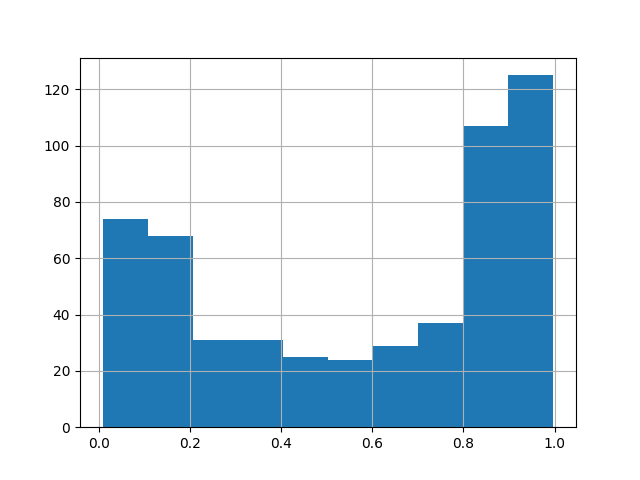

In [61]:
scoredMatches['win_prob'].hist()

In [63]:
list(matches)

['Unnamed: 0',
 'account_id',
 'assists',
 'attack_type_x',
 'camps_stacked',
 'cluster',
 'creeps_stacked',
 'deaths',
 'denies',
 'duration',
 'first_blood_time',
 'gold_per_min',
 'gold_spent',
 'hero_damage',
 'hero_healing',
 'hero_id',
 'kills',
 'last_hits',
 'leagueid',
 'leaguename',
 'level',
 'localized_name_x',
 'match_id',
 'player_slot',
 'primary_attr_x',
 'start_time',
 'stuns',
 't_experience_cnt_10',
 't_experience_cnt_12',
 't_experience_cnt_15',
 't_experience_cnt_20',
 't_experience_cnt_25',
 't_experience_cnt_3',
 't_experience_cnt_30',
 't_experience_cnt_5',
 't_experience_cnt_8',
 't_gold_cnt_10',
 't_gold_cnt_12',
 't_gold_cnt_15',
 't_gold_cnt_20',
 't_gold_cnt_25',
 't_gold_cnt_3',
 't_gold_cnt_30',
 't_gold_cnt_5',
 't_gold_cnt_8',
 't_lasthits_cnt_10',
 't_lasthits_cnt_12',
 't_lasthits_cnt_15',
 't_lasthits_cnt_20',
 't_lasthits_cnt_25',
 't_lasthits_cnt_3',
 't_lasthits_cnt_30',
 't_lasthits_cnt_5',
 't_lasthits_cnt_8',
 'team_id',
 'tower_damage',
 'win'